In [1]:
import numpy as np
import pandas as pd
import subprocess
import argparse
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager
#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

import os

def bins_labels(bins, startValue=0, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[startValue], bins[-1])

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path =  "../../data/"
dataset = "cb12/"

raw_path = path + dataset + "raw/" 
interim_path = path + dataset + "interim/"
processed_path = path + dataset + "processed/"

plots_path = r"../../plots/"

os.makedirs(plots_path, exist_ok=True)

In [3]:
interactions = pd.read_csv("../../data/cb12/interim/merged_valid_interactions.csv", header=0, sep='\t')
print(interactions.columns)
interactions.head()

Index(['Unnamed: 0', 'user_id', 'created_at', 'item_id', 'interaction_type',
       'session_id'],
      dtype='object')


,Unnamed: 0,user_id,created_at,item_id,interaction_type,session_id
0,0,9,1337034642,809208,0,3
1,1,9,1337035117,136489,0,3
2,2,9,1337035689,617374,0,3
3,3,14,1337092157,206046,0,7
4,4,14,1337092390,787741,0,7


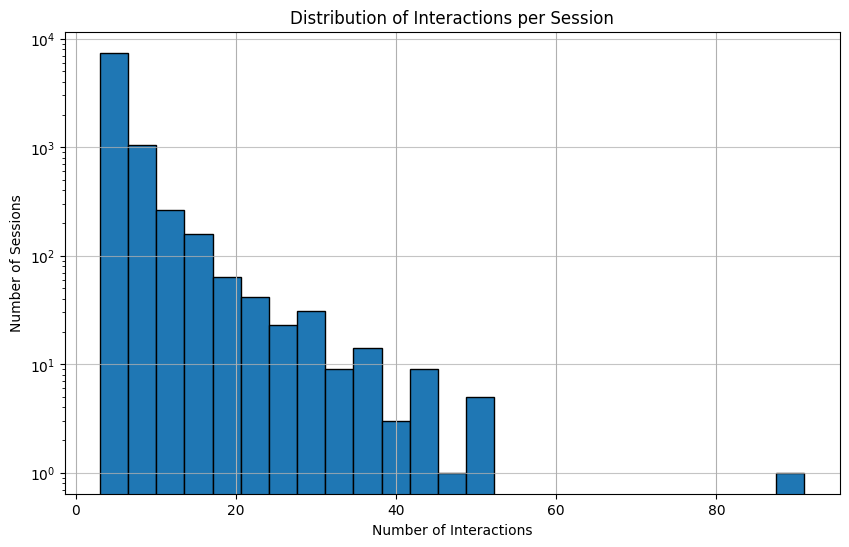

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If you need to load it from a file, uncomment the following line:
# df = pd.read_csv('your_file.csv')

df = interactions

# Group by session_id and count interactions per session
interactions_per_session = df.groupby('session_id').size()

# Plot the histogram
plt.figure(figsize=(10, 6))
interactions_per_session.hist(bins=25, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Interactions per Session')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Sessions')
plt.yscale('log')

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

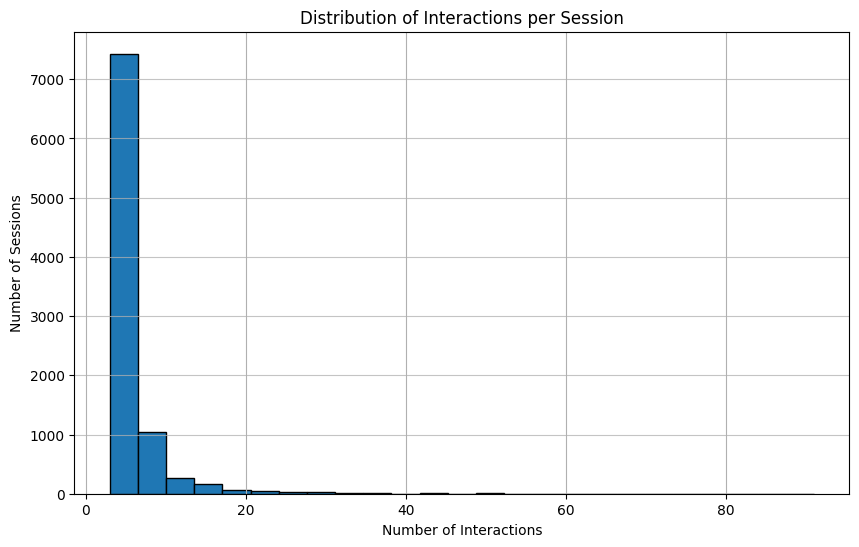

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# If you need to load it from a file, uncomment the following line:
# df = pd.read_csv('your_file.csv')

df = interactions

# Group by session_id and count interactions per session
interactions_per_session = df.groupby('session_id').size()

# Plot the histogram
plt.figure(figsize=(10, 6))
interactions_per_session.hist(bins=25, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Interactions per Session')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Sessions')

# Show the plot
plt.grid(axis='y', alpha=0.75)
plt.show()

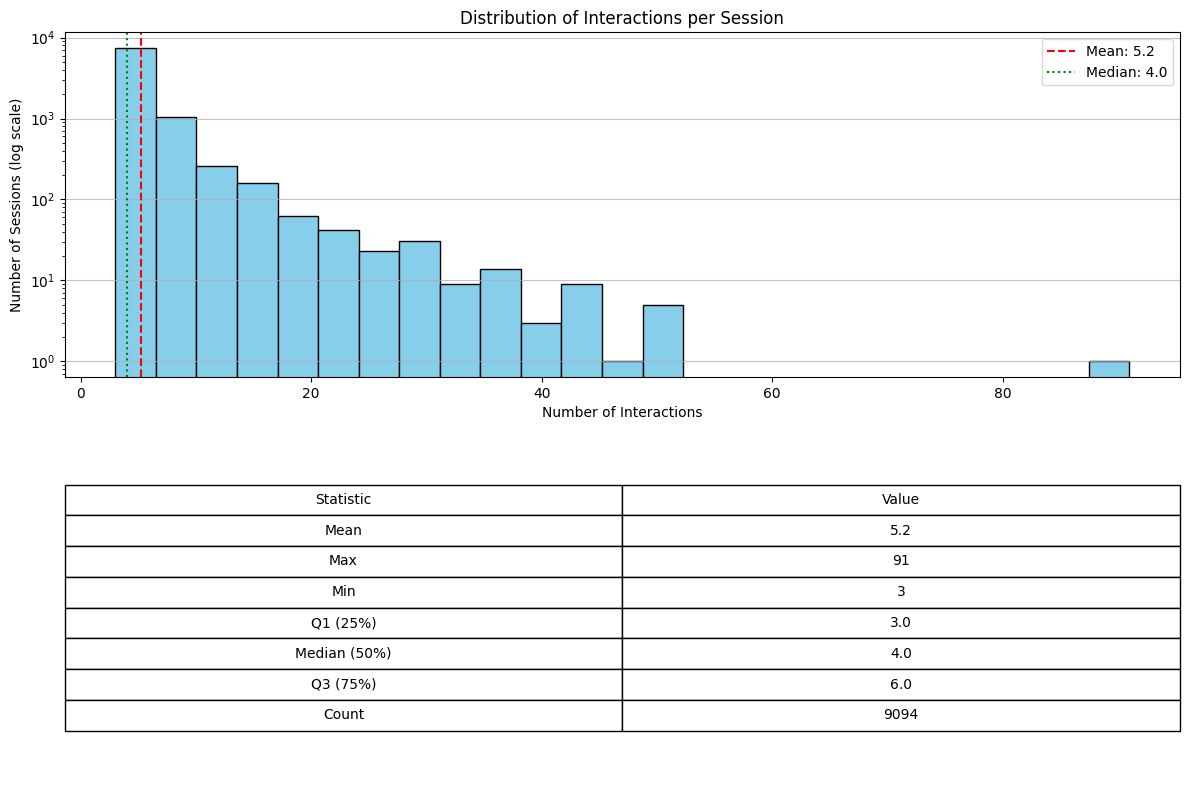


Interaction Statistics per Session:
Mean: 5.2
Max: 91
Min: 3
Q1 (25%): 3.0
Median (50%): 4.0
Q3 (75%): 6.0
Count: 9094


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate interactions per session
interactions_per_session = interactions.groupby('session_id').size()

# Calculate statistics
stats = {
    'Mean': interactions_per_session.mean(),
    'Max': interactions_per_session.max(),
    'Min': interactions_per_session.min(),
    'Q1 (25%)': np.percentile(interactions_per_session, 25),
    'Median (50%)': np.percentile(interactions_per_session, 50),
    'Q3 (75%)': np.percentile(interactions_per_session, 75),
    'Count': len(interactions_per_session)
}

# Create figure with two subplots (histogram and stats)
plt.figure(figsize=(12, 8))

# Histogram plot
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(interactions_per_session, 
                           bins=25, 
                           edgecolor='black', 
                           color='skyblue',
                           log=True)
plt.title('Distribution of Interactions per Session')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Sessions (log scale)')
plt.grid(axis='y', alpha=0.75)

# Add vertical lines for statistics
plt.axvline(stats['Mean'], color='red', linestyle='--', label=f"Mean: {stats['Mean']:.1f}")
plt.axvline(stats['Median (50%)'], color='green', linestyle=':', label=f"Median: {stats['Median (50%)']:.1f}")
plt.legend()

# Statistics table
plt.subplot(2, 1, 2)
plt.axis('off')
table_data = [[k, f"{v:.1f}" if isinstance(v, float) else v] for k, v in stats.items()]
table = plt.table(cellText=table_data,
                 colLabels=['Statistic', 'Value'],
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

# Print statistics in console as well
print("\nInteraction Statistics per Session:")
for stat, value in stats.items():
    print(f"{stat}: {value:.1f}" if isinstance(value, float) else f"{stat}: {value}")

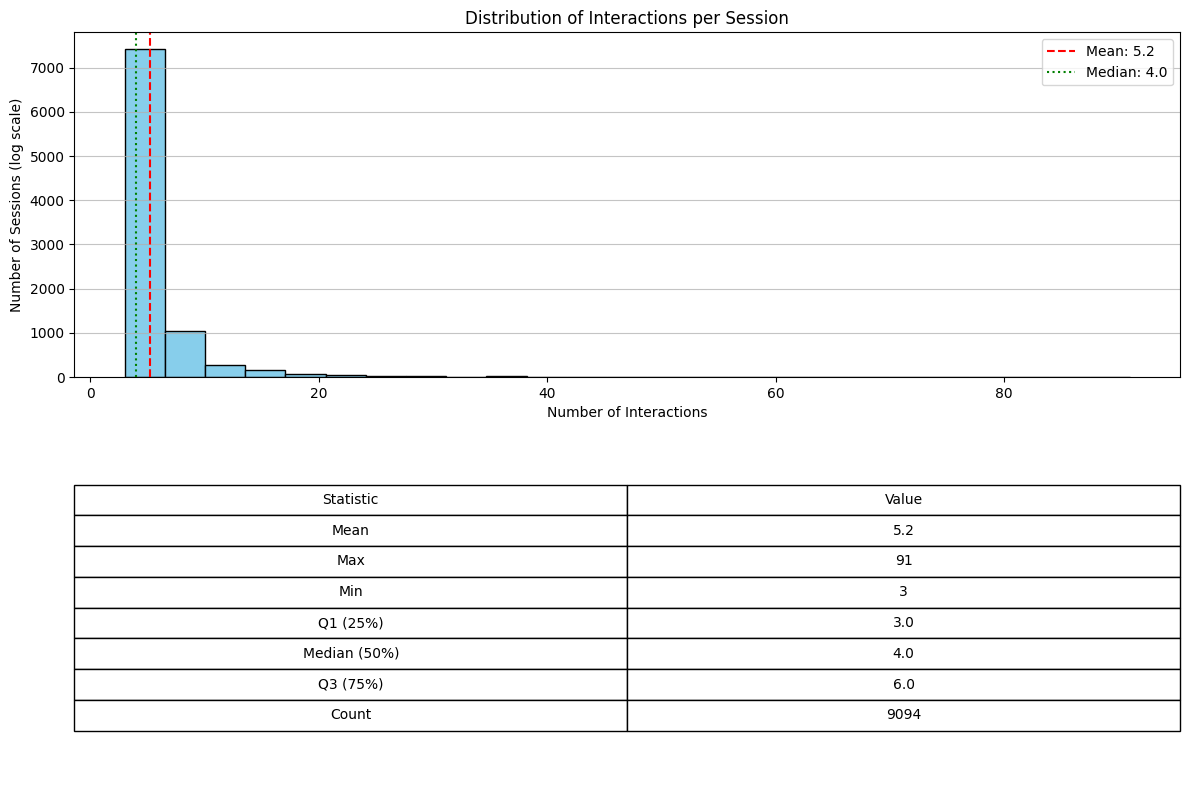


Interaction Statistics per Session:
Mean: 5.2
Max: 91
Min: 3
Q1 (25%): 3.0
Median (50%): 4.0
Q3 (75%): 6.0
Count: 9094


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate interactions per session
interactions_per_session = interactions.groupby('session_id').size()

# Calculate statistics
stats = {
    'Mean': interactions_per_session.mean(),
    'Max': interactions_per_session.max(),
    'Min': interactions_per_session.min(),
    'Q1 (25%)': np.percentile(interactions_per_session, 25),
    'Median (50%)': np.percentile(interactions_per_session, 50),
    'Q3 (75%)': np.percentile(interactions_per_session, 75),
    'Count': len(interactions_per_session)
}

# Create figure with two subplots (histogram and stats)
plt.figure(figsize=(12, 8))

# Histogram plot
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(interactions_per_session, 
                           bins=25, 
                           edgecolor='black', 
                           color='skyblue',
                           #log=True
                           )
plt.title('Distribution of Interactions per Session')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Sessions (log scale)')
plt.grid(axis='y', alpha=0.75)

# Add vertical lines for statistics
plt.axvline(stats['Mean'], color='red', linestyle='--', label=f"Mean: {stats['Mean']:.1f}")
plt.axvline(stats['Median (50%)'], color='green', linestyle=':', label=f"Median: {stats['Median (50%)']:.1f}")
plt.legend()

# Statistics table
plt.subplot(2, 1, 2)
plt.axis('off')
table_data = [[k, f"{v:.1f}" if isinstance(v, float) else v] for k, v in stats.items()]
table = plt.table(cellText=table_data,
                 colLabels=['Statistic', 'Value'],
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.tight_layout()
plt.show()

# Print statistics in console as well
print("\nInteraction Statistics per Session:")
for stat, value in stats.items():
    print(f"{stat}: {value:.1f}" if isinstance(value, float) else f"{stat}: {value}")

In [8]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
#interactions.interaction_type.plot(kind="bar")
interaction_sizes = interactions.groupby("interaction_type").size()
interaction_sizes

In [ ]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(15,8))

#plt.rcParams['text.usetex'] = False

interaction_sizes.plot(kind="bar", logy=False, ax = ax, color = "skyblue", ec="black")
ax.set_xticklabels(["APPLY"], rotation='horizontal')

font = 10

#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(12) 
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(12) 
    
ax.get_yaxis().set_major_formatter(
    tck.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('CareerBuilder 2012', fontsize = font)
ax.set_xlabel('Interaction Type', fontsize = font)
ax.set_ylabel('Num Interactions', fontsize = font)
f.tight_layout()
#plt.rcParams['text.usetex'] = False
f.savefig("../../plots/cb12_interactions.pdf", dpi=300, bbox_inches='tight')

In [ ]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(15,8))

session_sizes = interactions.groupby("session_id").size()
session_sizes = session_sizes[session_sizes < 1000] # remove 1 outlier
print(session_sizes.max())
session_sizes.plot(kind="hist", logy=True, ax = ax, bins=25, color = "skyblue", ec="black")

font = 35

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(25) 

ax.set_title('CareerBuilder 2012', fontsize = font)
ax.set_xlabel('Interactions in session', fontsize = font)
ax.set_ylabel('\# Sessions', fontsize = font)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
plt.minorticks_on()
f.tight_layout()
f.savefig("../../plots/cb12_session_sizes.pdf", dpi=300, bbox_inches='tight')

In [ ]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(10,5))

sessions_with_applies = interactions[interactions.interaction_type == 0]

session_apply_sizes = sessions_with_applies.groupby("session_id").size()

bins = range(11)
session_apply_sizes.plot(kind="hist", logy=True, ax = ax, bins=bins, color = "skyblue", ec="black")
#bins_labels(bins, 1, fontsize=14)

# Corrected bin labels (now matches 10 labels for 10 bars)
# Convert bins to a NumPy array for calculations
bins_array = np.array(bins)
# Compute bin centers (now works because bins_array is a NumPy array)
bin_centers = 0.5 * (bins_array[:-1] + bins_array[1:])  # [0.5, 1.5, ..., 9.5]
# Set the ticks and labels
ax.set_xticks(bin_centers)
ax.set_xticklabels(bins_array[:-1], fontsize=14)  # Labels: [0, 1, ..., 9]

font = 20

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14) 

ax.set_title('CareerBuilder 2012: Job application events', fontsize = font)
ax.set_xlabel('Number of apply events within a session', fontsize = font)
ax.set_ylabel('\# Sessions', fontsize = font)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
f.tight_layout()
f.savefig("../../plots/cb12_session_apply_events.pdf", dpi=300)

In [ ]:
# check if an item appeared several times in one session
%matplotlib inline
train = pd.read_csv("../../data/cb12/processed/train_valid_14d.csv", sep='\t')
train_sessions = train.groupby("session_id")

remind_counts = []

for  sid, sgroup in train_sessions:
    vc = sgroup["item_id"].value_counts()
    vc = vc[vc > 1]
    if len(vc) >= 1:
        remind_counts.append(len(vc))
        
df = pd.DataFrame(remind_counts, columns=["remind_counts"])

In [ ]:
df.head()

In [ ]:
train.head()

In [ ]:
train_sessions.head()

In [ ]:
train[train['session_id']==sid]

In [ ]:
sid

In [ ]:
sgroup

In [ ]:
df.plot(kind="hist")
print(len(train_sessions))
print(len(df))
df.median()